<a href="https://colab.research.google.com/github/1900690/grape-sky-segmentation/blob/main/grape-sky-binarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#画像からGRVIとGEIを計算して画像として表示する
参考：[UAV による農作物の判別と生育状況把握](https://www.tuis.ac.jp/media/R1_J5_3.pdf)

参考：[デジタルカメラと画像処理ソフト「Fiji-ImageJ」を用いたブドウの葉面積指数の簡易推定技術](https://www.naro.go.jp/laboratory/karc/prefectural_results/files/R02_4_04.pdf)

考察
R(空値の範囲内)
G(空値の範囲内)
B(空値の範囲内)
なら空ピクセルとして認識する



1.   画像から空の色値を収集
*   マスク画像をcolabに読み込ませて[画像から使用されている色(RGB)を抽出](https://qiita.com/777nancy/items/8bc565433d16b2ce63a6)で空色のRGBインデックスを作成
*   空のみ見える黒マスクを作成
*   RGBインデックスから各色のカラーバーを作成
2.   あるピクセルのRGBがすべて空値内に含まれるならマスクを作成する
*   検知したい画像をRGBに分割、上記のカラーバーで二値化
*   各色画像を組み合わせて白色の部分を空として検出
3.   単純にアプリ化する




Saving cut-grape-LAI22.jpg to cut-grape-LAI22.jpg


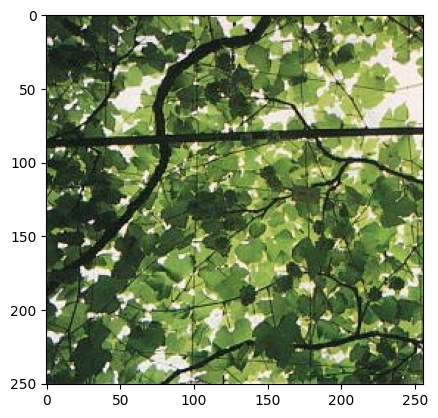

In [ ]:
#@title 表示する画像をアップロード
from google.colab import files
uploaded_file = files.upload()
uploaded_file_name = next(iter(uploaded_file))

#読み込んだ画像を表示
#・OpenCVを使って画像を読み込む cv2.imreadでOpenCV形式に変換 OpenCVはBGRなのでcvtColorでRGBに直してから表示する
import cv2
from matplotlib import pyplot as plt
orig = cv2.imread(uploaded_file_name)
src = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
plt.imshow(src)

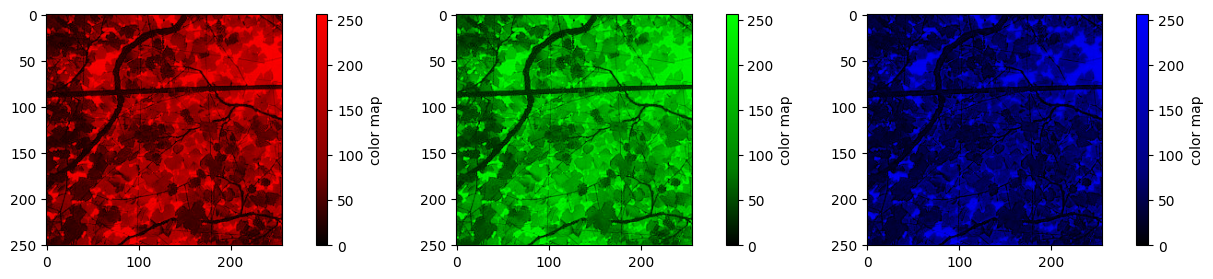

In [ ]:
#@title RGBに分けた画像を表示
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

#カラーマップ作製
#赤
r1 = np.array([0,0,0]) / 256
r2 = np.array([128,0,0]) / 256
r3 = np.array([192,0,0]) / 256
r4 = np.array([256,0,0]) / 256
cmr = LinearSegmentedColormap.from_list(name='customred', colors=[r1, r2, r3, r4])
#緑
g1 = np.array([0,0,0]) / 256
g2 = np.array([0,128,0]) / 256
g3 = np.array([0,192,0]) / 256
g4 = np.array([0,256, 0]) / 256
cmg = LinearSegmentedColormap.from_list(name='customgreen', colors=[g1, g2, g3, g4])
#青
b1 = np.array([0,0,0]) / 256
b2 = np.array([0,0,128]) / 256
b3 = np.array([0,0,192]) / 256
b4 = np.array([0,0,256]) / 256
cmb = LinearSegmentedColormap.from_list(name='customblue', colors=[b1, b2, b3, b4])

#色の指定の最小値、最大値
vmin,vmax = 0, 256

r = np.array(src[:, :, 0], dtype=np.int16)
g = np.array(src[:, :, 1], dtype=np.int16)
b = np.array(src[:, :, 2], dtype=np.int16)

#図を表示
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.imshow(r,cmap = cmr, vmin=vmin, vmax=vmax)
plt.colorbar( label = 'color map', pad = 0.1)
plt.subplot(1,3,2)
plt.imshow(g,cmap = cmg, vmin=vmin, vmax=vmax)
plt.colorbar( label = 'color map', pad = 0.1)
plt.subplot(1,3,3)
plt.imshow(b,cmap = cmb, vmin=vmin, vmax=vmax)
plt.colorbar( label = 'color map', pad = 0.1)

In [ ]:
r

array([[ 90,  96,  86, ..., 247, 252, 254],
       [ 44,  48,  50, ..., 203, 161, 223],
       [115,  87,  81, ..., 182,  79, 184],
       ...,
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1]], dtype=int16)

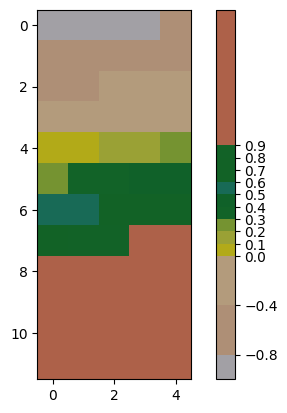

In [ ]:
#@title 表示用の不連続カラーマップを作製
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

list_cid = ['#A2A0A5', '#A2A0A5', '#AE8F76',
            '#AE8F76', '#AE8F76', '#AE8F76',
            '#B39B7C', '#B39B7C', '#B39B7C',
            '#B39B7C', '#B2AA19', '#9AA135',
            '#759331', '#126328', '#106129',
            '#186A56', '#126226', '#126226',
            '#126227', '#AD6149', '#AD6149',
            '#AD6149', '#AD6149', '#AD6149',
            '#AD6149', '#AD6149', '#AD6149',
            '#AD6149', '#AD6149', '#AD6149']

list_label = ['-1.0～-0.9', '-0.9～-0.8','-0.8～-0.7',
              '-0.7～-0.6', '-0.6～-0.5','-0.5～-0.4',
              '-0.4～-0.3', '-0.3～-0.2','-0.2～-0.1',
              '-0.1～0.0', '0.0～0.1','0.1～0.2',
              '0.2～0.3', '0.3～0.4','0.4～0.5',
              '0.5～0.6', '0.6～0.7','0.7～0.8',
              '0.8～0.9', '0.9～1.0','1.0～1.1',
              '1.1～1.2', '1.2～1.3','1.3～1.4',
              '1.4～1.5', '1.5～1.6','1.6～1.7',
              '1.7～1.8', '1.8～1.9','1.9～2.0']
list_ticks = [-0.8, -0.4,
              0.0, 0.1,
              0.2, 0.3,
              0.4, 0.5,
              0.6, 0.7,
              0.8, 0.9,]
vmin,vmax = -1, 2
test=np.linspace(-1, 2, 60)

cm = LinearSegmentedColormap.from_list('custom_cmap', list_cid, N=len(list_cid))
plt.imshow(test.reshape(12,5), cmap=cm, interpolation='nearest', vmin=vmin, vmax=vmax)
cbar = plt.colorbar(extend='neither', ticks=list_ticks)

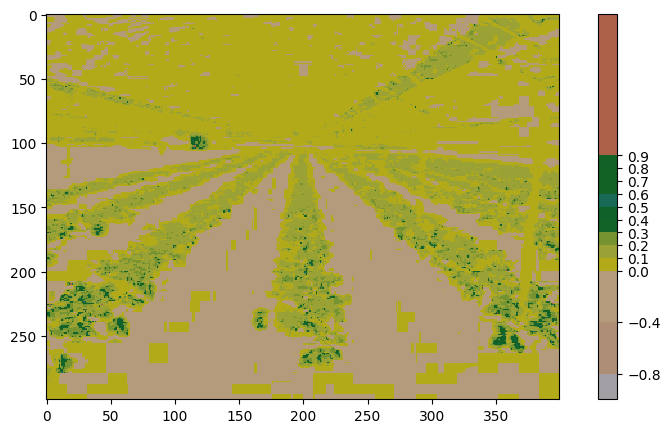

In [ ]:
#@title GRVIを計算して表示
#マイナスをかける
r_reverse=-1*r
#np.savetxt('/content/r_reverse.txt', r_reverse)

#分子を計算
GRVI_up=g+r_reverse

#分母を計算
GRVI_down=g+r

#0で割らないように0->1に置き換える
GRVI_down_no_zero=np.where(GRVI_down== 0, 1,GRVI_down)

#割り算
GRVI=GRVI_up/GRVI_down_no_zero

#表示
plt.figure(figsize=(10,5))
plt.imshow(GRVI,cmap = cm,interpolation='nearest', vmin=vmin, vmax=vmax)
cbar = plt.colorbar(extend='neither', ticks=list_ticks)

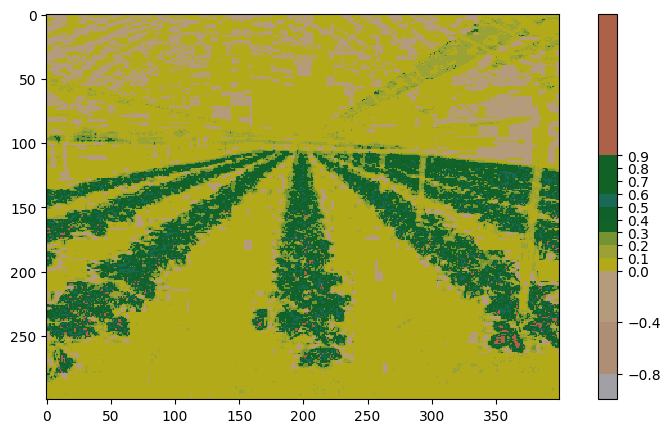

In [ ]:
#@title GEIを計算して表示
#マイナスをかける
r_reverse=-1*r
b_reverse=-1*b
#np.savetxt('/content/r_reverse.txt', r_reverse)

#分子を計算
GEI_up=2*g+r_reverse+b_reverse

#分母を計算
GEI_down=r+g+b

#0で割らないように0->1に置き換える
GEI_down_no_zero=np.where(GEI_down== 0, 1,GEI_down)

#割り算
GEI=GEI_up/GEI_down_no_zero
#np.savetxt('/content/GEI.txt', GEI)
#表示
plt.figure(figsize=(10,5))
plt.imshow(GEI,cmap = cm,interpolation='nearest', vmin=vmin, vmax=vmax)
cbar = plt.colorbar(extend='neither', ticks=list_ticks)

<ipython-input-23-81f5e49f048e>:9: RuntimeWarning: invalid value encountered in log
  GEI_log=np.log(GEI_no_zero)


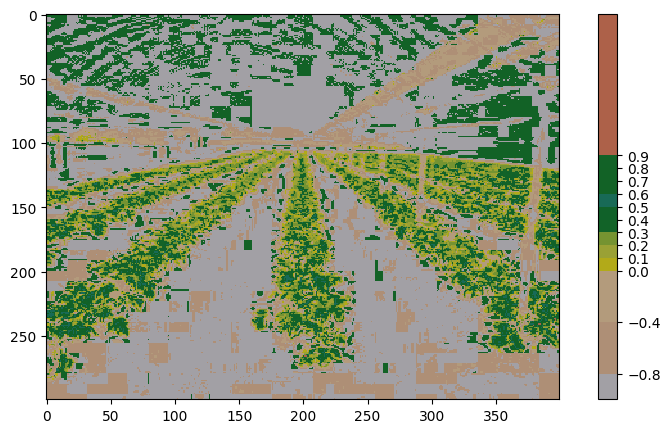

In [ ]:
#@title 準NDVIを計算
#@markdown y=a*log(x)+bでa=0.18、b=0.71で計算

a=0.18 #@param {type:"number"}
b=0.71 #@param {type:"number"}
#0で割らないように0->0.01に置き換える
GEI_no_zero=np.where(GEI== 0, 0.01,GEI)
#logを計算
GEI_log=np.log(GEI_no_zero)
#log(-x)は虚数となって存在しないためnanとなっているところを-0.8で置き換え
GEI_log_nonan=np.nan_to_num(GEI_log, nan=0)
#np.savetxt('/content/GEI_log_nonan.txt', GEI_log_nonan)

#画像を表示
quasi_NDVI=a*GEI_log_nonan+b
plt.figure(figsize=(10,5))
plt.imshow(quasi_NDVI,cmap = cm,interpolation='nearest', vmin=vmin, vmax=vmax)
cbar = plt.colorbar(extend='neither', ticks=list_ticks)

#VARIを使うなら

RGB カラーのバンドを利用して算出する指標
詳しくは要検索

VARI = (Green – Red) / (Green + Red – Blue)